# Object Detection

In this notebook, I want to record how to make a object detector with HOG+LinearSVM algorithms.
Let's just started with 6-steps for making one.

In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### - Step1: Sample P positive samples from training data of the object(cars), and extract HOG descriptors from these samples.
- I trained car_side images from CALTECH-101 dataset

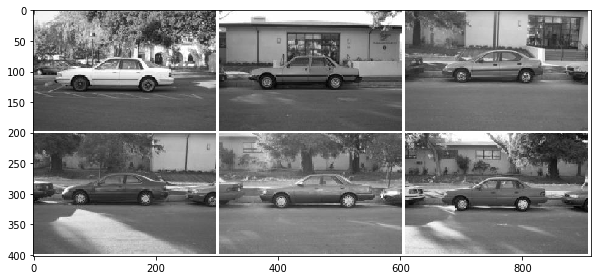

In [2]:
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread("p-data.jpg"))

・There are 2 steps for preparing P data. <br>
(1) Extract the bounding box of the object <br>
(2) Computing HOG features over this ROI. <br>
-> These HOG features would serve as your positive examples that we’ll later feed into our Linear SVM. <br>

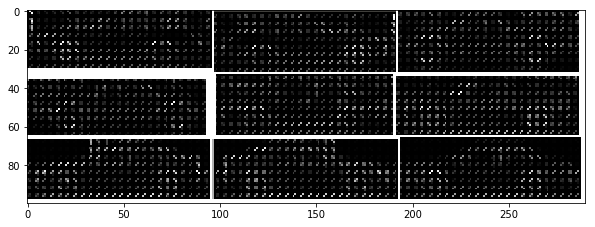

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread("hog-feature.png"))

### - Step2: Sample N negative samples from a negative training set that does not contain any of the object(cars), and extract HOG descriptors from these samples as well

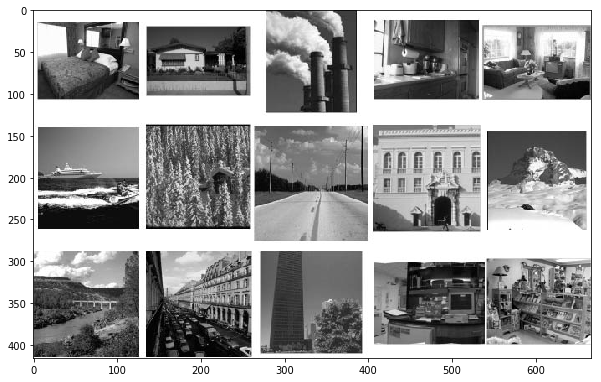

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread("n-dataset.jpg"))

・We will randomly sample image patches from this dataset and extract HOG features from them

### - Step3: Train a Linear Support Vector Machine on the positive and negative samples

・Train HOG feature vectors associated with both the positive and begative samples.

### - Step4: Apply hard-negative mining

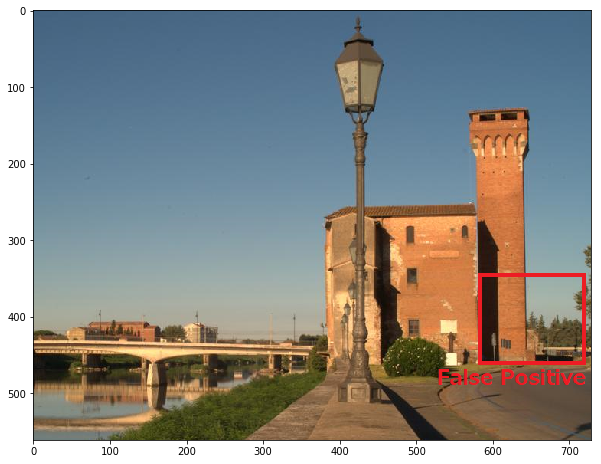

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(mpimg.imread("hn.png"))

・Each image in the negative training set, apply the sliding window technique and slide your window across the image. <br>
・If the classifier incorrectly classifies a given window as an object(false-positives), record the feature vector.

### - Step5: Retrain the classifier

・Take the false-positive samples found during the hard-negative mining stage, sort them by their probability, and re-train the classifier

### - Step6: Detect the object

- Test the classifier with data which has never exposured to the classifier
- Use a sliding windows technique and <b>Non-Maxima Suppression</b> to pick out the most appropriate boundary box that locate the object

## Result

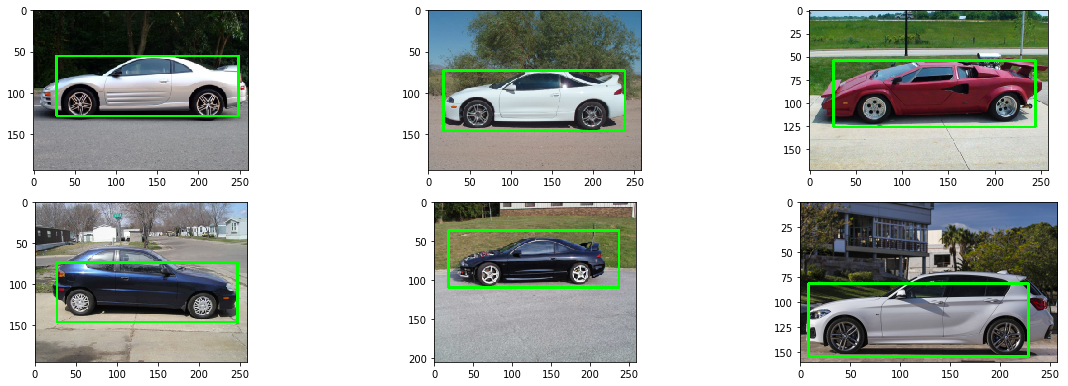

In [6]:
images = []
for img_path in glob.glob('test*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)